In [46]:
from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np

## Dataset

In [47]:
# Number of Classes
n_class = 10
n_in_dim = 28 ** 2

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
## Prepare Data
# 
x_train = x_train.reshape(x_train.shape[0], n_in_dim).astype('float32')
x_test = x_test.reshape(x_test.shape[0], n_in_dim).astype('float32')

# one hot encoding
y_train = np_utils.to_categorical(y_train, n_class)
y_test = np_utils.to_categorical(y_test, n_class)

# Model 1

In [49]:
# Parameters
n_hidden = 30
n_epoch = 5

In [50]:
model = Sequential()
model.add(Dense(units = n_hidden, activation='relu', input_dim = n_in_dim))
model.add(Dense(units = n_class, activation='softmax', input_dim = n_hidden))

In [52]:
result = model.fit(x_train, y_train, epochs = n_epoch, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 14.5189 - acc: 0.0992

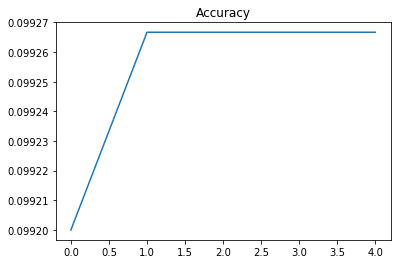

In [65]:
plt.plot(range(n_epoch), result.history['acc'], label='train')
plt.title('Accuracy')
plt.show()

# Model 2

Dropout and Adadelta

Epoch 1/5
60000/60000 [==============================] - 8s 128us/step - loss: 5.7931 - acc: 0.5234  

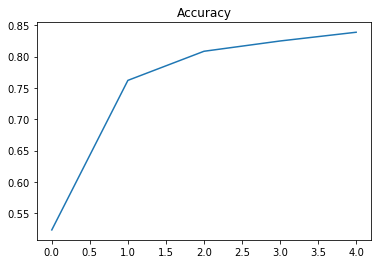

In [72]:
n_epoch = 5
model = Sequential()
model.add(Dense(units = n_hidden, activation='relu', input_dim = n_in_dim))
model.add(Dropout(rate=0.2))
model.add(Dense(units = n_class, activation='softmax', input_dim = n_hidden))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

result = model.fit(x_train, y_train, epochs = n_epoch, batch_size=32)

plt.plot(range(n_epoch), result.history['acc'], label='train')
plt.title('Accuracy')
plt.show()

# Model 3

Epoch 1/5
60000/60000 [==============================] - 2s 40us/step - loss: 5.5732 - acc: 0.6451

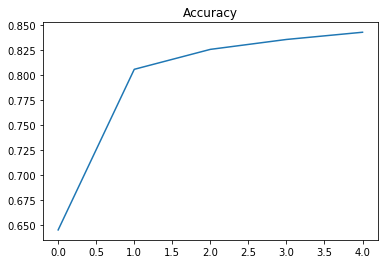

In [78]:
n_epoch = 5
n_hidden = 128

model = Sequential()
model.add(Dense(units = n_hidden, activation='relu', input_dim = n_in_dim))
model.add(Dropout(rate=0.2))
model.add(Dense(units = n_class, activation='softmax', input_dim = n_hidden))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

result = model.fit(x_train, y_train, epochs = n_epoch, batch_size=256)

plt.plot(range(n_epoch), result.history['acc'], label='train')
plt.title('Accuracy')
plt.show()